Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [x] Look at the data. Choose a feature, and plot its relationship with the target.
- [x] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [x] Define a function to make new predictions and explain the model coefficient.
- [x] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [x] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [122]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [123]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [124]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [125]:
#EDA into data types and feature selection
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   created               48818 non-null  object 
 3   description           47393 non-null  object 
 4   display_address       48685 non-null  object 
 5   latitude              48818 non-null  float64
 6   longitude             48818 non-null  float64
 7   price                 48818 non-null  int64  
 8   street_address        48808 non-null  object 
 9   interest_level        48818 non-null  object 
 10  elevator              48818 non-null  int64  
 11  cats_allowed          48818 non-null  int64  
 12  hardwood_floors       48818 non-null  int64  
 13  dogs_allowed          48818 non-null  int64  
 14  doorman               48818 non-null  int64  
 15  dishwasher         

In [126]:
df.head(6)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,4,2016-04-19 04:24:47,,West 18th Street,40.7429,-74.0028,7995,350 West 18th Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


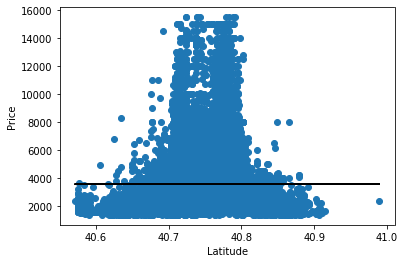

In [127]:
#pick a feature and plot relation with target 
#choose feature, target
import matplotlib.pyplot as plt
#setting a baseline to compare my predictor to
y = df['price']
y_mean = y.mean()
y_pred = [y_mean] * len(y)
plt.scatter(df['latitude'],df['price'])
plt.plot(df['latitude'],y_pred,label='avg as basline',color='black')
plt.xlabel('Latitude')
plt.ylabel('Price');

In [128]:
# the MAE to compare my preditor to 
from sklearn.metrics import mean_absolute_error
print('baseline MAE: ',mean_absolute_error(y,y_pred))

baseline MAE:  1201.5251847945751


In [129]:
#Use scikit-learn linear regression with one feature 
# following Jake VanderPlas 5 step process
# 1. Choose class of model and import from Scikit-learn
from sklearn.linear_model import LinearRegression
# 2. Choose model hyperparamets by instantiating model with desired values
model = LinearRegression()
# 3. Arrange data into feature matrix, and target vector
X = df[['latitude']] 
y = df['price']
# 4. Fit the model
model.fit(X,y)
print(f'latitude coef:{model.coef_}')
print(f'model intercept:{model.intercept_}')
# 5. Apply model to new data
model.predict([[40.7],[39.01],[40.89],[41.42]])

latitude coef:[-1638.14190247]
model intercept:70335.08264693896


array([3662.70721642, 6431.16703159, 3351.46025495, 2483.24504664])

In [130]:
# Define a function to make new predictions and explain the model coefficient
print(f'Price = {model.intercept_.round(3)} + {model.coef_[0].round(3)} * latitude')
# model coef explained: for every +1 unit change in latitude, price will change -1638.142 dollars. 

Price = 70335.083 + -1638.142 * latitude


No handles with labels found to put in legend.


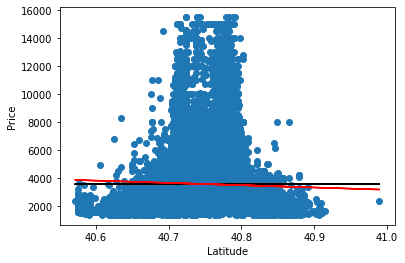

In [131]:
# compare baseline to predictor model
plt.scatter(df['latitude'],df['price'])
plt.plot(df['latitude'],y_pred,label='avg as basline',color='black')
plt.plot(df['latitude'], model.predict(X),label='linear model', color='red')
plt.xlabel('Latitude')
plt.ylabel('Price')
ax.legend();

In [132]:
# Hard to visual see IF our model is better than the baseline so lets compare the MAE
print('Training MAE:', mean_absolute_error(y,model.predict(X)))
print('Baseline MAE:',mean_absolute_error(y,y_pred))

Training MAE: 1199.0473456069935
Baseline MAE: 1201.5251847945751


Final thoughts on latitude as a predictor feature? 
The model I created seemed to barely improve upon the baseline and they may communicate that I selected a poor feature for a uni-variate linear regression model, lets choose another and see if it works better

In [146]:
# lets test this with 2 variables now, lets pick longitude to go along with our other
# geographical feature 
X_2 = df[['latitude','longitude']]
print(f'latitude coef:{model.coef_}')
print(f'model intercept:{model.intercept_}')
model.fit(X_2,y)
print('Training MAE with 2 features:', mean_absolute_error(y,model.predict(X_2)))

latitude coef:[  2758.74848212 -18394.98636195    879.40884148]
model intercept:-1470921.1870513486
Training MAE with 2 features: 1146.531815002574


In [134]:
# New prediction formula 
print(f'Price = {model.intercept_.round(3)} + {model.coef_[0].round(3)} * latitude +{model.coef_[1].round(3)} * longitude')

Price = -1302010.405 + 2347.993 * latitude +-16356.122 * longitude


In [138]:
# why not try for 3 features: longitude, latitude, and bedrooms
# 1. Choose class of model and import from Scikit-learn
from sklearn.linear_model import LinearRegression
# 2. Choose model hyperparamets by instantiating model with desired values
model = LinearRegression()
# 3. Arrange data into feature matrix, and target vector
X_3 = df[['latitude','longitude','bedrooms']] 
y = df['price']
# 4. Fit the model
model.fit(X_3,y)
print(f'latitude coef:{model.coef_}')
print(f'model intercept:{model.intercept_}')


latitude coef:[  2758.74848212 -18394.98636195    879.40884148]
model intercept:-1470921.1870513486


In [139]:
print(f'Price = {model.intercept_.round(2)} + {model.coef_[0].round(2)} * latitude +{model.coef_[1].round(2)} * longitude + {model.coef_[2].round(2)} * bedrooms')

Price = -1470921.19 + 2758.75 * latitude +-18394.99 * longitude + 879.41 * bedrooms
